<a href="https://colab.research.google.com/github/rpizarrog/innovacion-empresarial/blob/main/notebook_python/Caso_01_Regresi%C3%B3n_Lineal_Simple_Estaturas_Pesos_Personas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo

Construir y evaluar un modelo de regresión lineal simple con valores numéricos de estaturas y pesos corporales de personas.


# Descripción

* Cargar librerías.
* Crear funciones.
* Cargar datos.
* Análisis descriptivo exploratorio.
  * Visualizar datos.
    * Histograma.
    * Diagrama de caja.
    * Dispersión de los datos.
*  Crear modelo de regresión lineal simple.
  * Identificar métricas *r square* con valor por encima del $50$% para aceptar el modelo y de *RMSE* cercano a 0 que deberá ser comparado con otro modelo de regresión.
  * Partir en datos de entrenamiento y datos de validación con el $70$% y $30$%.
  * Evaluar modelo con datos de entrenamiento con el valor *r square*.
  * Visualizar recta de regresión con el modelo construído y los datos de entrenamiento.
  * Realizar predicciones utilizando el modelo con los datos de validación.
  * Evaluar el modelo con el estadístico RMSE *root mean square error*
* Interpretar el caso.


# Dearrollo

## Cargar librerías


In [ ]:
import pandas as pd
import numpy as np
from collections import Counter as Counter
import math
from sklearn.linear_model import LinearRegression # Para contruir el modelo

import matplotlib.pyplot as plt # Para visualizar datos
from sklearn.model_selection import train_test_split # Para partir los datos

from sklearn import metrics # Para determinar métricas.



## Crear funciones

Se crean funciones personalizadas útiles el desarrollo del caso.


In [ ]:
# Función que devuelve estad´siticos de una variable numérica
def f_media_moda_mediana_n(datos):
  # Calcular la media aritmética
  media = np.mean(datos)

  # Calcular la moda
  contador = Counter(datos)
  moda = contador.most_common(1)[0][0]

  # Calcular la mediana
  mediana = np.median(datos)

  # ¿Cuántos nnpúmeros son?
  n = len(datos)
  return media, moda, mediana, n

# Función que devuelve las medias aritméticas y desviaciones estándar de dos variables numéricas de una muestra
def f_medias (independiente, dependiente):
  medias = [np.mean(independiente), np.mean(dependiente)]
  return medias

# Función que devuelve las desviaciones estándar de dos variables numéricas de una muestra
def f_desviaciones_std (independiente, dependiente):
  desviaciones = [np.std(independiente, ddof=1), np.std(dependiente, ddof=1)]
  return desviaciones

# Función que devuelve la covariana y correlación de Pearson y r square de dos variables numéricas de una muestra
def f_cov_corr(independiente, dependiente):
  covar = np.cov(independiente, dependiente, ddof=1)[0,1]
  r = np.corrcoef(independiente, dependiente)[0,1]
  r_square = r ** 2
  return covar, r, r_square

# Función que construye diagrama de dispersión
def f_dispersion (x, y, x_nombre, y_nombre):
  medias = f_medias(x, y)

   # Crear el diagrama de dispersión
  plt.scatter(x, y, s = 5)

  # Etiquetas y título
  plt.xlabel(x_nombre)
  plt.ylabel(y_nombre)
  plt.title('Diagrama de Dispersión')
  plt.axvline(x=medias[0], color='blue', linestyle='--', linewidth=0.5,
            label="Media "+ x_nombre + ":" + str(np.round(medias[0], 2)))
  plt.axhline(y=medias[1], color='green', linestyle='--', linewidth=0.5,
            label="Media "+ y_nombre+":" + str(np.round(medias[1], 2)))
  plt.legend()
  # Mostrar el diagrama de dispersión
  plt.show()

# función que visualiza historama de una variable numérica en estructira tipo lista
# Re Utiliza la función f_media_moda_mediana_n
def f_histograma(datos, contexto):
  min = np.min(datos)
  max = np.max(datos)

  # Calcular el número óptimo de clases usando la regla de Sturges
  n = len(numeros)
  k = int(round(1 + math.log2(n)))


  plt.hist(datos, bins=range(min, max, k), edgecolor="black")
  plt.xlabel(contexto)

  media, moda, mediana, N = f_media_moda_mediana_n(datos)

  # Agregar líneas punteadas roja, azul y verde para representar media, mediana y moda
  medias = f_media_moda_mediana_n(datos)
  plt.axvline(x=media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
  plt.axvline(x=mediana, color='blue', linestyle='--', linewidth=2, label=f'Mediana: {mediana:.2f}')
  plt.axvline(x=moda, color='yellow', linestyle='--', linewidth=2, label=f'Moda: {moda:.2f}')

  plt.ylabel("Frecuencia")
  plt.title("Distribución de los datos: "+contexto)

  plt.legend()
  plt.grid(False)
  plt.show()

# Calcula los cuartiles
def f_cuartiles_quantile(datos):
  q1 = np.percentile(datos, 25)
  q2 = np.percentile(datos, 50)
  q3 = np.percentile(datos, 75)
  return q1, q2, q3

# Visualiza diagrama de caja para indentificar datos extremos
def f_diagrama_caja (datos, contexto):
  plt.boxplot(datos, vert=False)
  plt.xlabel(contexto)
  plt.ylabel('Valor')
  plt.title('Diagrama de Caja')

  # Calculando cuartiles d ela funci´pn previamente creada
  q1, q2, q3= f_cuartiles_quantile(datos)
  # Añadir leyendas para los cuartiles
  plt.axvline(x=q1, color='blue', linestyle='--', linewidth=1, label=f'Q1: {q1:.2f}')
  plt.axvline(x=q2, color='blue', linestyle='--', linewidth=1, label=f'Q2:Mediana: {q2:.2f}')
  plt.axvline(x=q3, color='blue', linestyle='--', linewidth=1, label=f'Q3: {q3:.2f}')

  # Añadir leyenda adicional
  plt.legend()

  plt.show()

# Función que devuelve la covariana y correlación de Pearson y r square de dos variables numéricas de una muestra
def f_cov_corr(independiente, dependiente):
  covar = np.cov(independiente, dependiente, ddof=1)[0,1]
  r = np.corrcoef(independiente, dependiente)[0,1]
  r_square = r ** 2
  return covar, r, r_square

def f_dispersion (x, y, x_nombre, y_nombre):
  medias = f_medias(x, y)

   # Crear el diagrama de dispersión
  plt.scatter(x, y, s = 5)

  # Etiquetas y título
  plt.xlabel(x_nombre)
  plt.ylabel(y_nombre)
  plt.title('Diagrama de Dispersión')
  plt.axvline(x=medias[0], color='blue', linestyle='--', linewidth=0.5,
            label="Media "+ x_nombre + ":" + str(np.round(medias[0], 2)))
  plt.axhline(y=medias[1], color='green', linestyle='--', linewidth=0.5,
            label="Media "+ y_nombre+":" + str(np.round(medias[1], 2)))
  plt.legend()
  # Mostrar el diagrama de dispersión
  plt.show()

# función que visualzia la recta de regesi,ón
# Graficar los datos y la regresión lineal
def f_regresion(modelo):
  plt.scatter(estaturas, pesos, color='blue', s=5)
  #plt.plot(estaturas, modelo.predict(estaturas), color='red', label = "")
  plt.plot(estaturas, modelo.predict(estaturas), color='red', linewidth=0.5, label=f'a = {a}; b = {b}')

  plt.xlabel('Estatura (cm)')
  plt.ylabel('Peso (kg)')
  plt.title('Regresión Lineal Simple')
  plt.legend()
  plt.grid(True)

# Esto debe ser una fución

def f_regresion_linea_tendencia(modelo, x, y, x_nombre, y_nombre):
  # Graficar los datos y la regresión lineal
  plt.scatter(x, y, color='blue', s=5)
  a = modelo.intercept_  # El alor de la intersección de la abcisa
  b = modelo.coef_       # El valor de la pendiente

  # Datos de cova y correlacion con los valores de entrenamiento
  covar, r, r_square = f_cov_corr(estaturas_train, pesos_train)

  # Líena de tendencia
  linea_tendencia = modelo.predict(estaturas_train.reshape(-1, 1))
  plt.plot(estaturas_train.reshape(-1, 1), linea_tendencia, color='red', linewidth=0.5,
           label=f'a = {np.round(a, 4)}; b = {np.round(b, 4)}; r={np.round(r, 4)}; r square = {np.round(r_square, 4)}')

  plt.xlabel(x_nombre)
  plt.ylabel(y_nombre)
  plt.title('Regresión Lineal Simple. Datos de Entrenamiento')
  plt.legend()
  plt.grid(True)



## Crear o cargar datos


In [ ]:
datos = datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/innovacion-empresarial/main/datos/estaturas_pesos.csv", encoding='latin1')
print(datos)


    obs  estaturas  pesos
0     1        178     79
1     2        172     75
2     3        160     62
3     4        192    107
4     5        167     72
5     6        170     52
6     7        185     90
7     8        175     70
8     9        180     85
9    10        170     92
10   11        180     87
11   12        180     82
12   13        170     75
13   14        183     90
14   15        161     65
15   16        150     56
16   17        162     56
17   18        177     82
18   19        190     95
19   20        165     70
20   21        164     80
21   22        183     92
22   23        175     74
23   24        168     65
24   25        170     77
25   26        175     72
26   27        175     65
27   28        178     70
28   29        170     75
29   30        160     65
30   31        162     60
31   32        166     67
32   33        178     75
33   34        170     70
34   35        163     60
35   36        165     72
36   37        170     76
37   38     


## Análisis descriptivo

Se presentan los estadísticos mas importantes de las variables de interés con la función *describe()*

### Estadísticos

In [ ]:
datos[['estaturas', 'pesos']].describe()

,estaturas,pesos
count,50.000000,50.000000
mean,171.980000,74.060000
std,8.999977,11.468519
min,150.000000,52.000000
25%,165.000000,65.000000
50%,170.000000,74.500000
75%,178.000000,79.750000
max,192.000000,107.000000


### Histograma

Histograma de las variables de interés estaturas y de pesos.

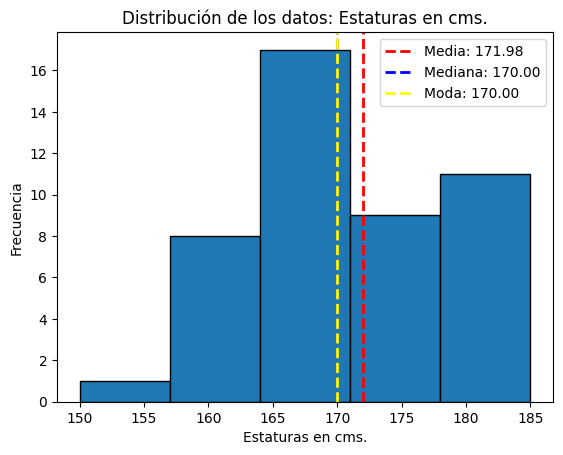

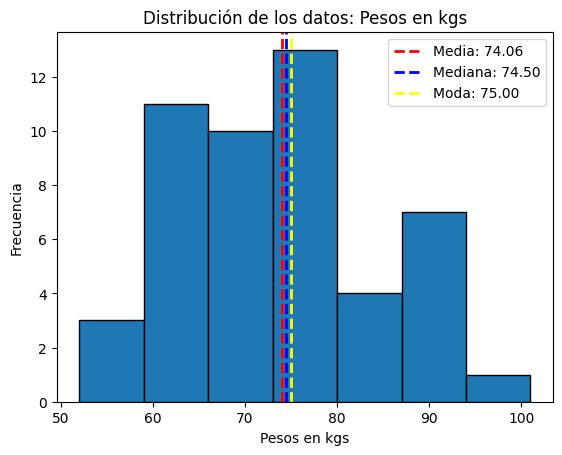

In [ ]:
f_histograma(datos['estaturas'], "Estaturas en cms.")

f_histograma(datos['pesos'], "Pesos en kgs")


### Diagramas de caja

Se exploran los datos mediante el diagrama de caja de las variables de interés estaturas y pesoso para identifiar si hay valores atípicos.

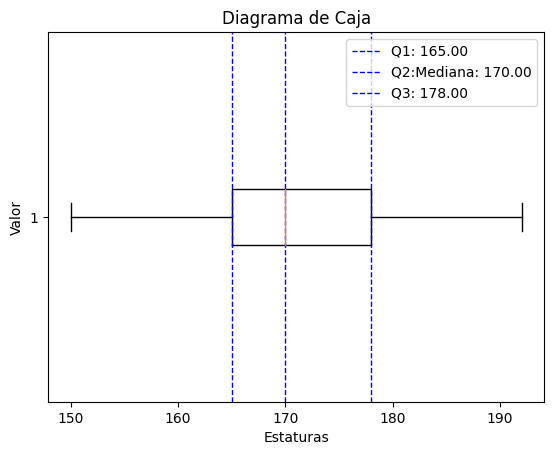

In [ ]:
f_diagrama_caja(datos['estaturas'], "Estaturas")

No hay valores atípicos en los valores de la variable estaturas.

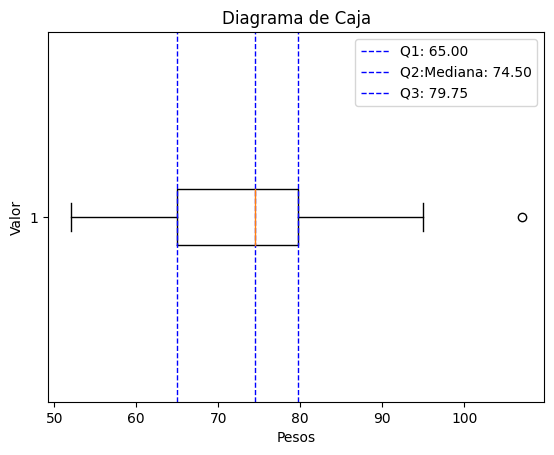

In [ ]:
f_diagrama_caja(datos['pesos'], "Pesos")

Existe un valor atípico en la variable peos por encima de 100 o más kgs.

La pregunta es, ¿qué hacer con ese dato?, verificarlo y dejarlo o modificar su valor y transformarlo a un valor numéricos veraz, viable o verificable que ouede ser el valor de la media aritmética o la mediana.

### Dispersión de los datos



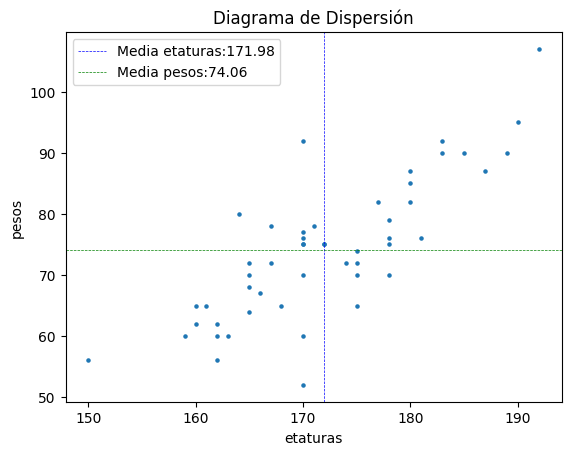

In [ ]:
f_dispersion(datos['estaturas'], datos['pesos'], "etaturas", "pesos")


## Crear modelo de regresión lineal simple.

### Preparar datos

Se extraen las variables estaturas y pesos a tipo de datos listas numpy para facilitar su uso.

In [ ]:
estaturas = datos['estaturas'].to_numpy()
pesos = datos['pesos'].to_numpy()

print (estaturas)
print(pesos)




[178 172 160 192 167 170 185 175 180 170 180 180 170 183 161 150 162 177
 190 165 164 183 175 168 170 175 175 178 170 160 162 166 178 170 163 165
 170 167 159 165 181 170 172 171 178 165 162 187 189 174]
[ 79  75  62 107  72  52  90  70  85  92  87  82  75  90  65  56  56  82
  95  70  80  92  74  65  77  72  65  70  75  65  60  67  75  70  60  72
  76  78  60  68  76  60  75  78  76  64  62  87  90  72]


## Métricas de evaluación

El modelo se acepta si el valor de *r square* sobrepasa el $50$% tanto con los datos de entrenamiento como con los datos de validación.

El modelo a través de la métrica *root mean square error (RMSE)* que significa que tanto varía las predicciones con respecto a los datos reales se deberá comparar con otros modelos y los mismos datos para evalura su rendimiento.



## Crear datos de entrenamiento y validación

* Los datos de entrenamiento serán aleatoriamente el 70% de los datos originales.
* Los datos de validación o prueba (test) serán aleatoriamente el complemento del 30%.
* Los datos de entrenamiento y datos de validación deben
set mutuamente excluyentes que signifia que están en uno conjunto o están en el otro.

Ahora que se tiene la variable independiente estaturas y la variable dependiente pesos, el siguiente paso es dividir estos datos en conjuntos de entrenamiento y prueba o validación.

Se utiiza el método *train_test_split()* que forma parte de la librería Scikit-Learn para dividir los datos en entrenamiento y validación.

El argumento *test_size* establece el 30% para datos de validación por lo que el $70$% pertenece a los datos de entrenamiento y el resto a datos de validación o prueba.

In [ ]:



estaturas_train, estaturas_test, pesos_train, pesos_test = train_test_split(estaturas, pesos, test_size=0.3,
                                                                            random_state=2024)

# Crear un DataFrame con los datos de entrenamiento
datos_entrenamiento = pd.DataFrame({'estaturas': estaturas_train, 'pesos': pesos_train})

# Datos de entrenamiento
print(datos_entrenamiento)

# Crear un DataFrame con los datos de validación o test
datos_validacion = pd.DataFrame({'estaturas': estaturas_test, 'pesos': pesos_test})


# Datos de validación
print(datos_validacion)



    estaturas  pesos
0         172     75
1         170     77
2         170     70
3         174     72
4         167     72
5         165     70
6         170     52
7         159     60
8         171     78
9         165     64
10        164     80
11        185     90
12        170     92
13        168     65
14        190     95
15        175     74
16        175     70
17        162     62
18        170     75
19        180     82
20        166     67
21        178     76
22        162     60
23        167     78
24        189     90
25        160     62
26        180     87
27        165     72
28        172     75
29        170     60
30        170     76
31        178     70
32        178     79
33        178     75
34        180     85
    estaturas  pesos
0         175     72
1         177     82
2         181     76
3         165     68
4         170     75
5         192    107
6         183     90
7         175     65
8         162     56
9         163     60
10        150

## Construir el modelo

Se construye el modelo de regresión lineal simple y se ajusta con los datos de entrenamiento. La función *reshape()* significa que los valores se reciben de manera bidimensional porque así los necesia el modelo.

In [ ]:

modelo = LinearRegression()
modelo.fit(estaturas_train.reshape(-1, 1), pesos_train.reshape(-1, 1))


LinearRegression()

### Coeficientes

Se extraen los coeficienes y b de la fórmula de mínimos cuadrados
$$
\text{Predicción Y = } a + b\cdot x_i
$$
ó
$$
\text{Predicción Y = } \beta_0 + \beta_1\cdot x_i
$$

In [ ]:
a = modelo.intercept_  # El alor de la intersección de la abcisa
b = modelo.coef_       # El valor de la pendiente
print ("Coeficiente a :", a)
print ("Coeficiente b :", b)


Coeficiente a : [-87.0232808]
Coeficiente b : [[0.93646132]]


### Recta de regresión

Se manda llamar la función *f_regresion_linea_tendencia()* para observar la recta de regresión.

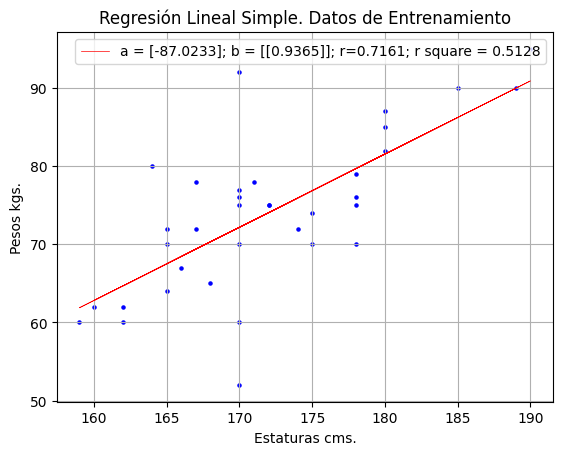

In [ ]:

f_regresion_linea_tendencia(modelo, estaturas_train.reshape(-1, 1), pesos_train.reshape(-1, 1),
                             "Estaturas cms.", "Pesos kgs.")




## Métrica r square

In [ ]:
# Calcular el coeficiente de determinación R^2 o R square
score = modelo.score(estaturas_train.reshape(-1, 1), pesos_train.reshape(-1, 1))
print("Coeficiente de determinación R^2:", score)

Coeficiente de determinación R^2: 0.5127646600191104


La métrica de *r square* está por encima del $50$% por lo que el modelo se acepta y significa que la variable estaturas representa aproximadamente un $51$% a la variable pesos.

## Predicciones

¿Cuál es la predicción para valores de acuerdo al modelo de regresión lineal simple?
$$
\text{Predicción Y} = -87.0232 + 0.9364 \cdot x_i
$$

Se utilizan los datos de validación de la variable pesos para hacer las predicciones



In [ ]:
predicciones = modelo.predict(estaturas_test.reshape(-1, 1))
print(predicciones)

[[76.85744986]
 [78.73037249]
 [82.47621777]
 [67.49283668]
 [72.17514327]
 [92.77729226]
 [84.3491404 ]
 [76.85744986]
 [64.68345272]
 [65.61991404]
 [53.44591691]
 [63.7469914 ]
 [84.3491404 ]
 [62.81053009]
 [88.09498567]]


Crear un *data.frame* llamado comparaciones a partir de la creación de un diccionario con los valores reales del conjunto de validacipon y las predicciones calculadas.

Con la función flatten().tolist() convierte el arreglo a una lista de una dimensión.

In [ ]:

diccionario = {'Estatura': estaturas_test.flatten().tolist(),
                'Real' : pesos_test.flatten().tolist(),
               'Predicho' : predicciones.flatten().tolist() }
# diccionario

comparaciones = pd.DataFrame(diccionario)
print (comparaciones)

    Estatura  Real   Predicho
0        175    72  76.857450
1        177    82  78.730372
2        181    76  82.476218
3        165    68  67.492837
4        170    75  72.175143
5        192   107  92.777292
6        183    90  84.349140
7        175    65  76.857450
8        162    56  64.683453
9        163    60  65.619914
10       150    56  53.445917
11       161    65  63.746991
12       183    92  84.349140
13       160    65  62.810530
14       187    87  88.094986


¿Qué tanto se desvián las predicciones de los valores reales?

Error sstándar médio MSE
$$
MSE = \frac{\sum(predicho_i - real_i)^{2}}{n}
$$

Raiz del error estándar medio

$$
RMSE = \sqrt{\frac{\sum(predicho_i - real_i)^{2}}{n}}
$$

In [ ]:
print('Mean Absolute Error: MAE', metrics.mean_absolute_error(pesos_test, predicciones))
print('Mean Squared Error: MSE', metrics.mean_squared_error(pesos_test, predicciones))
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(pesos_test, predicciones)))

cova, r, r_square =  f_cov_corr(estaturas_test, pesos_test)
print ("r square = ", r_square)



Mean Absolute Error: MAE 5.247473734479468
Mean Squared Error: MSE 42.59253581832934
Root Mean Squared Error RMSE: 6.526295719497343
r square =  0.8102398802359017


# Interpretación

pendiente ...

Se cargó un conjnto de datos con variables de interés estaturas y pesos corporales de personas.

Se exploraron estadísticos de los datos observnandose que no existen datos atípicos.

Se construyó un modelo de regresión lineal simple con datos de entrenamiento. La variable estaturas fué la variable predictora o independiente y la variable peso fue la variable objetivo o dependiente.

A partir el modelo de regresión lineal simple se extrajeron los coeficientes de la abcisa o intersección  a  y la pendiente  b  teniendo valores de  a=-87.0232  y  b=0.9364 , que significan los coeficiente de la recta de regresión o recta de estimación.

* Coeficiente a : [-87.0232808]
* Coeficiente b : [0.93646132]

Se visualizó la dispersión de los datos con los valores de entrenamiento y se estimó la recta de regresión presentada también visualmente.

Habiendo relizado una evaluación del modelo con datos de entrenamiento o datos que se utilizaron para construir el modelo con el estadístico *r quare* o coeficiente de determinación se encontró que el valor de estaturas representa aproximadamente un  $51$ % al valor del peso corporal de una persona.

Se utilizaron datos de prueba o datos de validación con las mismas variables de estaturas y pesos para construir predicciones.

Habiendo relizado una evaluación del modelo con los datos de validación o datos de prueba con el estadístico *r square* o coeficiente de determinación se encontró que el valor de estatura representa aproximadamente un  81 % al valor del peso corporal de una persona.

El modelo se acepta datos que el valor de *r square* como métrica establecida inicialmente sobrepasa el  50 % tanto con los datos de entrenamiento como con los datos de validación.

El valor de *RMSE* *root mean square error* o error cuadrático medio significa eu tanto el modelo es eficiente y su valor cercano a cero representa esa eficiencia. El valor fue de   $6.52$  aproximadamente y debe ser comparado contra otro modelo para medir su eficiencia en relación con otros.

!Hasta la próxima!

